<center>
    <h1>Analysis of the ICFHR 2020 Competition on Image Retrieval for Historical Handwritten Fragments (HisFrag20) Dataset</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="./../../readme-head.png" align=center width=500>
    </div>
    <h2>Data Understanding for solving a Jigsaw Puzzle of Historical Fragments</h2>
    <h3> by Timo Bohnstedt</h3>
    <br>
</center>


<a name='0'></a>

### Outline for this Notebook `(clickable)`

1. [Data Distribution](#1) <br>
1.1. [Are the IDs meaningful? If not, where can I get more meaningful data?](#1.1) <br>
1.2. [How many writers are there?](#1.2) <br>
1.3. [How many pages do the autohers have?](#1.3) <br>
1.4. [How many fragments are there per page?](#1.3) <br>
2. [Image Analysis](#2) <br>
2.1. [How large are the images?](#1.2) <br>
2.2. [What does the work of an auther look like?](#1.3.)<br>
2.3. [What does a page of a particular author look like?](#1.3.)<br>
2.4. [What does it look like when an image is gradually assembled (GIF)?](#1.3.)<br>
2.5. [Optional: Is there any further information, e.g. where the pictures come from?](#1.3.)<br>

## 0. Preparation of the Notebook

In [74]:
# import packages
from os import listdir
from os.path import isfile, join, splitext
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

In [75]:
# declare global variables 
data_path = "/Users/beantown/Projekte/Jigsaw-Puzzling/Data/hisfrag20"
data_path_test = "/Users/beantown/Projekte/Jigsaw-Puzzling/Data/hisfrag20_test"

In [77]:
# prepare environtment
%matplotlib inline

In [61]:
# load file names train dataset
file_names = [splitext(f)[0] for f in listdir(data_path) if isfile(join(data_path, f))]

# load file name test dataset
file_names_test = [splitext(f)[0] for f in listdir(data_path_test) if isfile(join(data_path_test, f))]

<a name='1'></a>

## 1. Data Distribution

<a name='1.1'></a>

### 1.1. Are the IDs meaningful? If not, where can I get more meaningful data?


The dataset contains a training and a test set with the following image naming-convention: 

```ruby
WID_PID_FID.jpg 

where 
WID = writer id
PID = page id, 
FID = fragment id.

```

The **train set** contains arround **100,000 fragments** using the Historical-IR19 as base dataset, they should all contain some text even some fragments are quite small. The **test set** contains about **20,000** new fragments

First, I will print the filename (label) to see wheather or not the label tells something meaninful

In [62]:
# For training
print(file_names[0])

# For test
print(file_names_test[0])

9121_4046_13
219_77800500_10553


As can be seen the IDs are just IDs. Some reasrch has shown that is up to now not possible to get more information about the writer. But we can cange an save the name such that it is more meaninfull in terms of the nameing convention.

<a name='1.1'></a>
### 1.2. How many writers are there?

In [63]:
# Split the image naming in wirter, page and fragment
# For training
file_names_parts = [i.split("_") for i in file_names]
# For test
file_names_test_parts = [i.split("_") for i in file_names_test]

In [89]:
file_names_parts[0]

['9121', '4046', '13']

In [90]:
# For training
df = pd.DataFrame.from_records(file_names_parts,columns=['writer_id', 'page_id','fragment_id'],dtype=)
print('Within the train dataset there are {} unique writers'.format(df.nunique()[0])) 

Within the train dataset there are 8717 unique writers


In [91]:
# For test
df_test = pd.DataFrame.from_records(file_names_test_parts,columns=['writer_id', 'page_id','fragment_id'])
print('Within the test dataset there are {} unique writers'.format(df_test.nunique()[0]))

Within the test dataset there are 1152 unique writers


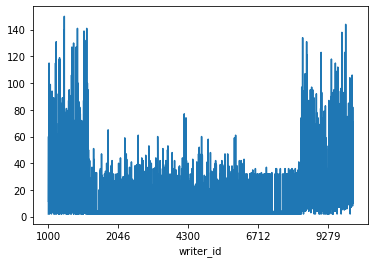

In [108]:
# Visualize how often each writer appers
# For training
df.groupby(['writer_id'])['page_id'].count().plot()

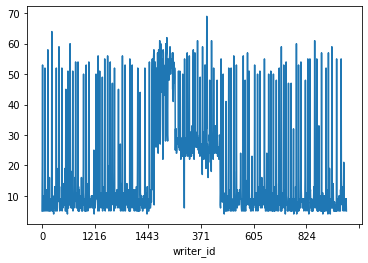

In [120]:
# For test
df_test.groupby(['writer_id'])['page_id'].count().plot()

It seems that not every writer has the same ammount of fragments or pages

<a name='1.2'></a>
### 1.2. How many pages do the writers have?

In [121]:
# For training
pages_per_writer = df.groupby(['writer_id'])['page_id'].count()
pages_per_writer

writer_id
1000      2
10000    11
10001    41
10002     9
10003    60
         ..
9995     13
9996     15
9997     82
9998     11
9999     10
Name: page_id, Length: 8717, dtype: int64

In [119]:
pages_per_writer.mean()

11.667660892508891

It seems that that the amount of pages is not even at all. We should use this knowledge within the preproceccing

<a name='1.3'></a>
### 1.3. How many fragments are there per page?

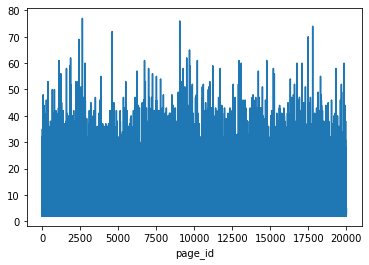

In [122]:
df.groupby(['page_id'])['fragment_id'].count().plot()

In [130]:
round(df.groupby(['page_id'])['fragment_id'].count().mean(),0)

6.0

<a name='2'></a>

## 2. Image Analysis

<a name='2.1'></a>
### 2.1. How large are the images?


<a name='2.2'></a>
### 2.2. What does the work of an auther look like?


<a name='2.3'></a>
### 2.3. What does a page of a particular author look like?


<a name='2.4'></a>
### 2.4. What does it look like when an image is gradually assembled (GIF)?



<a name='2.5'></a>
### 2.5. Optional: Is there any further information, e.g. where the pictures come from?